[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/tutorials/3_nb_predictive_analytics.ipynb) 

# Chapter 3 - Foundations of predictive analytics
The lecture has introduced the standard data structure for predictive analytics. We need data with input variables and a **target variable**. The goal of predictive analytics is to derive a functional relationship between the input variables and the target. We assume that we can observe, measure, or control the input variables. Hence, our predictive model, the functional relationship between inputs and the target, facilitates forecasting the expected value of the target variable based on the input variables. Whenever we observe a new case, we gather the values of the input variables for that case and feed them into our prediction model. Receiving that input, the model will produce a forecast of the target variable value for that cases. So, predictive analytics is all about finding *good* **input-to-output mappings**.

Recall from the lecture that many alternative terms are in use to refer to the input variables. Covariates, (independent) variables, attributes are only a few examples. In the interest of having consistent terminology, we will use the term **features** instead of input variables in the following. 

---

Here is the outline of the tutorial:
- Our first predictive model: linear regression
- The Boston Housing data set
- Data for classification 
- Synthetic data generation in sklearn

## Our first predictive model: linear regression
Linear regression assumes a linear additive relationship between features and the target. Specifically, we assume a model:
$$ y = \beta_0 + \beta_1 x_1 + + \beta_2 x_2 + ... + \beta_m x_m + \epsilon $$
where $y$ is the target variable, $\beta$ denotes the regression coefficients (as usual), $x_j, j=1, ..., m$ are our features, and $\epsilon$ denotes the error term. Adopting the above perspective, when using linear regression, we assume we *know* the true functional form of the input-to-out. Specifically, we assume this mapping to be linear and additive. Under this assumption, our task is to find the unknown parameters that characterize our mapping function, and these are the regression coefficients $\beta$. Some folks call models like linear regression **parametric models**. This is to emphasize that we assume to know the true functional form and then only have to estimate that function's free parameters. Remember classification and regression trees from the lecture? They work differently and exemplify a **non-parametric model**. The form of the tree is not (assumed to be) known a priori. Rather, the task is to find that form. 

Questions for the experts: what are the free parameters in a tree model?

### Data generation

To warm-up, let's create some synthetic data for regression modeling. To keep things simple, we consider a univariate setting with only feature. The classic example in business is that of a price response function, so we can assume that our single feature corresponds to the sales price of some product and our target to sales units.

In [1]:
# load relevant libraries

import random
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)  # stops Python from producing output in scientific notation

random.seed(888) # for reproducibility

In [2]:
n = 100 # dataset size

X = np.zeros(n) # initialize empty list

for i in range(n): # generate 100 numbers
  num = random.randint(20, 100) # will select integers randomly between 20 and 100
  X[i] = num # add integer to list X

X

array([ 30.,  75.,  94.,  76.,  83.,  69., 100.,  67.,  89.,  73.,  42.,
        70.,  68.,  75.,  54.,  68.,  89.,  21.,  94.,  87.,  67.,  70.,
        50.,  60.,  53.,  48.,  34.,  97.,  58.,  56.,  41.,  78.,  50.,
        45.,  97.,  49.,  25.,  91.,  46.,  86.,  82.,  21.,  29.,  77.,
        75.,  61.,  85.,  60.,  54.,  55.,  85.,  39.,  24.,  48.,  65.,
        70.,  69.,  83.,  46.,  47.,  87.,  59.,  55.,  36.,  28.,  62.,
        34.,  88.,  83.,  95.,  50.,  25.,  21.,  90.,  51.,  78.,  86.,
        29., 100.,  26.,  33.,  26.,  59.,  37.,  41.,  69.,  59.,  37.,
        56.,  61.,  51.,  24.,  63.,  34.,  59.,  28.,  34.,  33.,  31.,
        38.])

In case you are wondering: no, this was not the most efficient way to generate 100 random numbers between 20, and 100. Actually, it was not even *Python-style* programming. We are still new to Python. So we deliberately keep codes very simple and intuitive for now. You will see more elegant/advanced examples in later tutorials. For example, if you were to check NumPy's random functions, you will find `numpy.random.ranint()` which allows an argument called `size` which allows users to produce an array of that length.

In [3]:
y = np.zeros(n) # create array of 0s of the length X

for i in range(0, n):
  num = X[i]/2 + np.random.normal(0, 5, 1) # for this relationship, the true beta_1 = 0.5. Randomness also added.
  y[i] = num # replace 0s in y with the transformed X value

y= np.around(y, 2) # round all values to 2 decimals

print(y)

[18.36 26.94 42.43 37.68 52.25 29.58 46.4  39.89 40.19 38.99 15.31 33.52
 34.03 34.56 31.94 33.99 55.11  5.99 50.69 40.2  43.22 35.47 28.53 25.18
 32.05 19.25 15.35 48.8  28.22 33.13 26.36 37.26 18.55 15.28 38.26 25.44
  5.14 42.41 18.39 36.89 53.35  7.39 11.52 38.14 38.13 30.1  41.79 33.39
 24.73 27.33 34.89 27.32 11.92 26.99 31.77 36.19 32.55 31.68 24.55 28.88
 53.   26.66 29.9  20.03  6.41 29.42 22.93 40.7  40.77 57.3  19.38 12.36
 13.5  49.52 20.05 35.59 35.55 17.03 51.93 12.05 18.99  9.14 24.06 14.67
 25.2  31.39 33.72 24.62 28.39 32.29 24.45  2.53 31.08  8.52 27.85 10.99
 13.51 24.35 15.74 14.44]


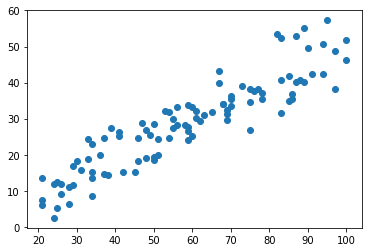

In [4]:
plt.scatter(X, y) # plot our X and y values on a scatterplot using pyplot

### Coefficient calculation

We know from our undergraduate studies how to compute our estimators $\hat \beta_0$ and $\hat \beta_1$ of the intercept and slope of our simple linear regression model, respectively. 

$$ \hat \beta_1 = \frac{\sum^{n}_{i=1}\left(x_i-\bar x \right) \left( y_i - \bar y\right)}{\sum^{n}_{i=1}\left(x_i-\bar x \right)^2} $$

$$ \hat \beta_0 = \bar y - \hat \beta_1 \bar x$$

where $\bar x$ and $\bar y$ denote the mean price (feature) and sales (target), respectively. 

Let's try to code this first by scratch. We can easily translate this formula into Python code to obtain the correct regression coefficients.

In [5]:
X_bar = np.mean(X)
y_bar = np.mean(y)

# recreate the beta hat 1 equation above:
denominator = numerator = 0 # initialize variables

for i in range(0,n):
  numerator += (X[i] - X_bar)*(y[i] - y_bar) # remember += means add the right hand side to the variable's value
  denominator += (X[i] - X_bar)**2
  beta_hat_1 = numerator / denominator

# recreate the beta hat 0 equation above:
beta_hat_0 = y_bar - beta_hat_1*X_bar

# check estimate values
print(beta_hat_0, beta_hat_1)

-1.1342062910457464 0.5118290008716828


To more easily plot this line on a graph, let's calculate the value of `y` when `x = 100`. We already have the value of `y` when `x = 0` which is the beta 0 value. After this, we can plot the data points and the line of best fit through the entire range of X.

In [6]:
y_val_x_at_100 = beta_hat_0 + beta_hat_1*100

print(y_val_x_at_100)

50.048693796122535


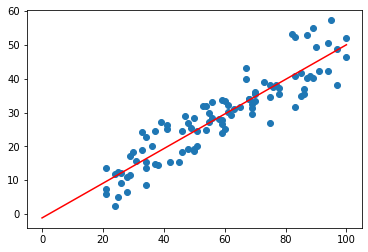

In [7]:
plt.scatter(X, y)
plt.plot([0, 100], [beta_hat_0, y_val_x_at_100],  color='red') # the first list are x coordinate values, the second are y values so this creates a line through (0, beta_hat_0) and (100, y_val_x_at_100)
plt.show()

### Using sklearn to solve
All of the above can be quickly and efficiently done also through sklean to obtain the same result. To use sklearn, it is important to reshape data so that it has the dimensions as a DataFrame. If we check the shape of `X` and `y`, we will get `(100,)` for both of them. To reshape them to be one column, we will need to use `.reshape(-1, 1)`. This will change the dimensions to `(100,1)`.

In [8]:
X = X.reshape(-1, 1) # reshapes array to a vertical column (originally the shape is (100,), we need it to be (100,1))
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(100, 1) (100, 1)


In [9]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression().fit(X, y)

print(lin.intercept_, lin.coef_) # these values correspond to estimated beta 0 and estimated beta 1 respectively

[-1.13420629] [[0.511829]]


Notice that the coefficients are the same when using sklearn and our self-coded version of regression.

### Predicting on new samples from the same population

Recall that the very point of predictive modeling is to forecast the value of the target variable for new cases. To demonstrate this, we can use the regression function just estimated, our model, and apply it to some novel data. We will first generate some new X values using the same random process and generate the corresponding y values using the same code. 

In [10]:
n_new = 10 # amount of new values to generate

X_new = np.random.randint(20, 100, size=n_new) # example using more efficient code to create a random array of integers

print(X_new)

[85 36 84 51 77 46 51 33 64 75]


In [11]:
y_true = np.zeros(n_new) # create array of 0s of the length X_new

for i in range(0, n_new):
  num = X_new[i]/2 + np.random.normal(0, 5, 1) # same relationship as before, true beta 1 is 0.5
  y_true[i] = num

y_true = np.around(y_true, 2) # round all values to 2 decimals

print(y_true)

[35.79 17.47 38.97 22.74 37.58 27.89 29.95  9.19 30.6  33.21]


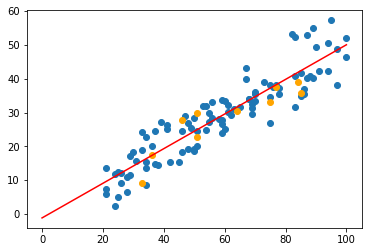

In [12]:
plt.scatter(X, y) # plot original points
plt.scatter(X_new, y_true, color='orange') # colour new points 
plt.plot([0, 100], [beta_hat_0, y_val_x_at_100], color='red') # pass line through coordinates (0, beta_hat_0) and (100, y_val_x_at_100)
plt.show()

We can now use our coefficients to predict the value of y for each of the new X values. Afterwards, it is a good idea to check the residuals or errors from the prediction to ensure that we are getting consistent results. We can these values in a aggregated error term like mean square error or root mean square error.



In [13]:
# use our model to predict the y value for the new X values:
y_pred = np.zeros(n_new)

for i in range(0, n_new):
  y_pred[i] = beta_hat_0 + beta_hat_1*X_new[i]

print(y_pred)

[42.37125878 17.29163774 41.85942978 24.96907275 38.27662678 22.40992775
 24.96907275 15.75615074 31.62284976 37.25296877]


In [14]:
# calculate residuals:

res = y_true - y_pred

print(res)

[-6.58125878  0.17836226 -2.88942978 -2.22907275 -0.69662678  5.48007225
  4.98092725 -6.56615074 -1.02284976 -4.04296877]


In [15]:
# root mean squared error:

pred_error = np.mean(np.sqrt(res**2))

print("RMSE of our regression model is {:.4}".format(pred_error))

RMSE of our regression model is 3.467


### Predictions for Different Populations

Predictive analytics is based on the assumption that the data, which we observed in the past or gathered during business operations is representative for future data. Note how the previous example fulfills this assumption. 
We used the same mechanism or *data generation process* to simulate the old and the new data. To stress the importance of stable data generation processes, **let us simulate what would happen if our environment changes**. For example, people might get more price sensitive in a recession, so that a price-response relationship that was estimated on data from before the recession is no longer representative. Let's simulate such a situation using Python.

In [16]:
y_true_2 = np.zeros(n_new) # create array of 0s of the length X_new

for i in range(0, n_new):
  num = X_new[i]/4 + np.random.normal(0, 5, 1) # altered relationship, now the true beta_1 is 0.25 instead of 0.5
  y_true_2[i] = num

y_true_2 = np.around(y_true_2, 2) # round all values to 2 decimals

print(y_true_2)

[24.39 13.74 19.27  8.98 21.59 10.41  9.64 10.48  8.23 15.12]


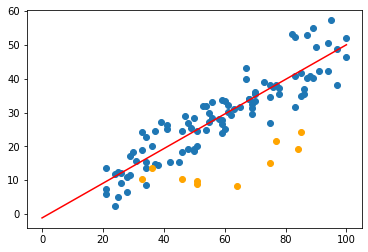

In [17]:
plt.scatter(X, y) # plot old points
plt.scatter(X_new, y_true_2, color='orange') # colour new points 
plt.plot([0,100], [beta_hat_0,y_val_x_at_100], color='red') # pass line through coordinates (0, beta_hat_0) and (100, y_val_x_at_100)
plt.show()

Just eyeballing the graph is enough to conclude that the estimated regression line (formally, the unknown parameters of our parametric predictive model) does no longer fit the new data. We can expect the RMSE to confirm this view. Let's check. 

In [18]:
y_pred_2 = np.zeros(n_new)

for i in range(0,n_new):
  y_pred_2[i] = beta_hat_0 + beta_hat_1 * X_new[i] # predict using our ORIGINAL coefficients

print(y_pred_2)

[42.37125878 17.29163774 41.85942978 24.96907275 38.27662678 22.40992775
 24.96907275 15.75615074 31.62284976 37.25296877]


In [19]:
res_2 = y_true_2 - y_pred_2

print(res_2)

[-17.98125878  -3.55163774 -22.58942978 -15.98907275 -16.68662678
 -11.99992775 -15.32907275  -5.27615074 -23.39284976 -22.13296877]


In [20]:
pred_error_2 = np.mean(np.sqrt(res_2 ** 2))

print("Error from similar data:", pred_error, ", Error from data with new relationship:", pred_error_2)

Error from similar data: 3.4667719128702443 , Error from data with new relationship: 15.492899561429558


You might think of this as a basic exercise. However, do not underestimate our example. You just learned a very important lesson that you should always bear in mind when venturing the realms of predictive analytics. If there is ever a change in the mechanism that generated your data, a predictive model will become outdated and its quality will decrease. Practically speaking, the hard part is to know when such a change occur. That is something for later. For now, we bear in mind that predictive analytics requires **the training data to represent well the data to which a model will be applied.** Practitioners often use terms like *production environment* or *model deployment* when speaking about predictive models. We like these terms a lot because they remind us that the conditions in which we use a model (i.e., the production environment) and in which we need the model to excel must be distinguished from the conditions in which we develop and test a model. So, we *deploy* a trained and tested model to a *production environment* (and hope for the best...)

## The Boston Housing Data Set
Let's now try the methods that we have been discussing on a real data set. Using sklearn we can download some data which are already prime for analysis. One of these data setes is called Boston Housing. In this dataset, we are given several characteristics (remember we call these features in machine learning) related real estate properties. Our goal is to predict the cost of housing using these characteristics. The cost of housing in this case is called the target variable.

If you are curious to see the data and the interpretations of each variable, check the explanation of the data set here: http://lib.stat.cmu.edu/datasets/boston .

### Load the data set

We will first import the data set and check the first few rows and its shape.

In [21]:
import sklearn.datasets as datasets
import pandas as pd

df = datasets.load_boston()

X = pd.DataFrame(data=df.data, columns=df.feature_names) # place input arrays into pandas DataFrame
y = pd.DataFrame(data=df.target, columns=['Target']) # place target array into pandas DataFrame

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
y.head()

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [23]:
print(X.shape, y.shape)

(506, 13) (506, 1)


### Initial EDA
Next, we will check for any `NaN` values and some basic properties of its features. We can do this by using the `.info()` and `.describe()` method for pandas DataFrames.

In [24]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [26]:
X.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [27]:
y.describe()

,Target
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


### Further EDA

We can also check variables' by displaying their distributions using a histogram. In addition, we can display a heatmap to check correlation between any two variables and include the target variable.

In [28]:
X.groupby('CHAS').size() # to check frequency of categorical or switch variables

CHAS
0.0    471
1.0     35
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ddc32b6d8>,
      dtype=object)

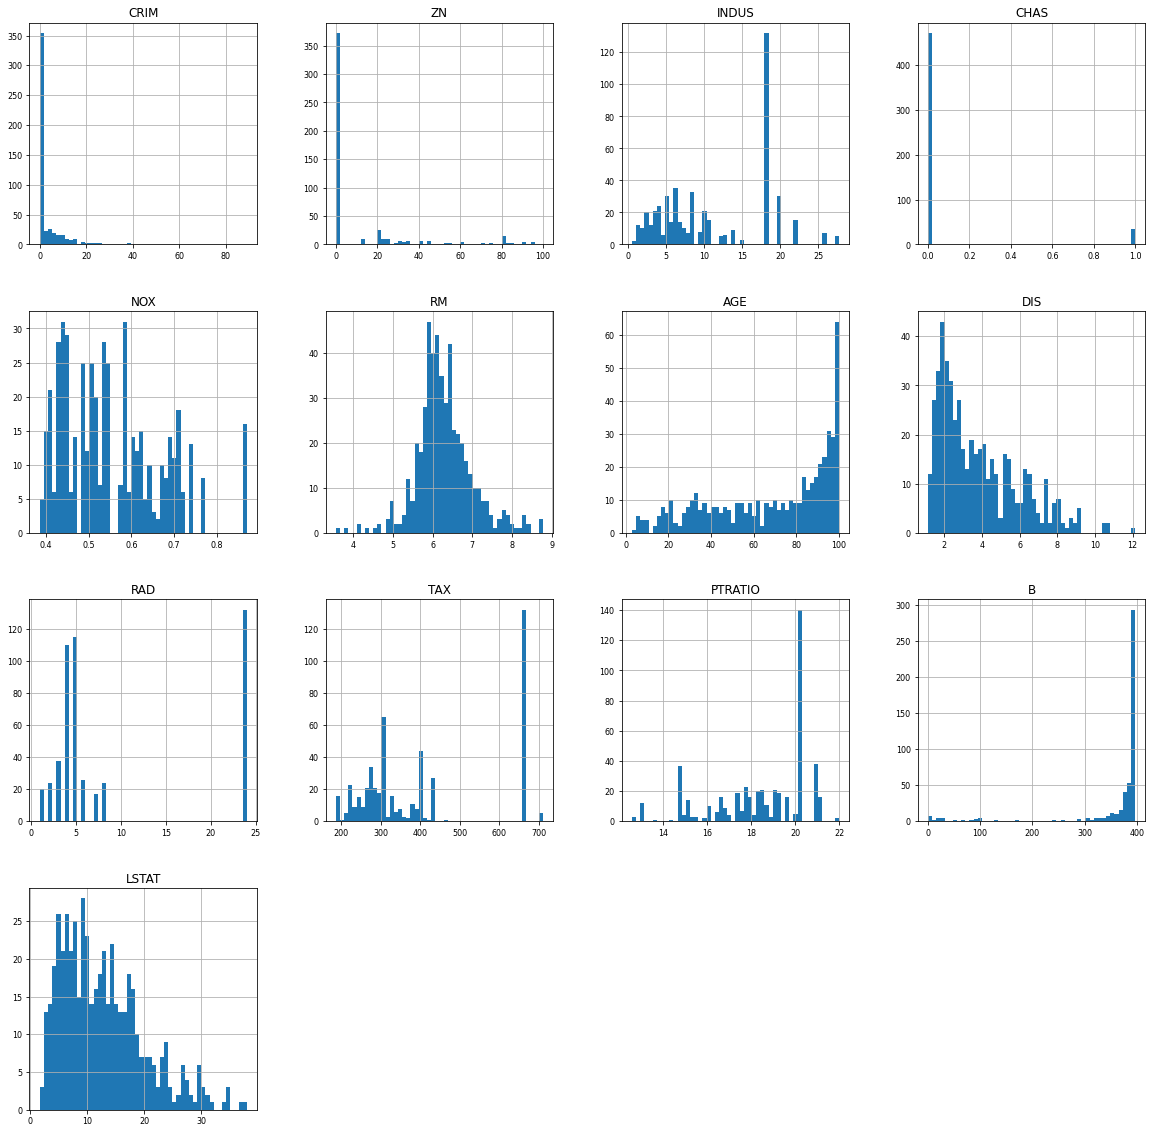

In [29]:
X.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8) # produces one histogram per feature

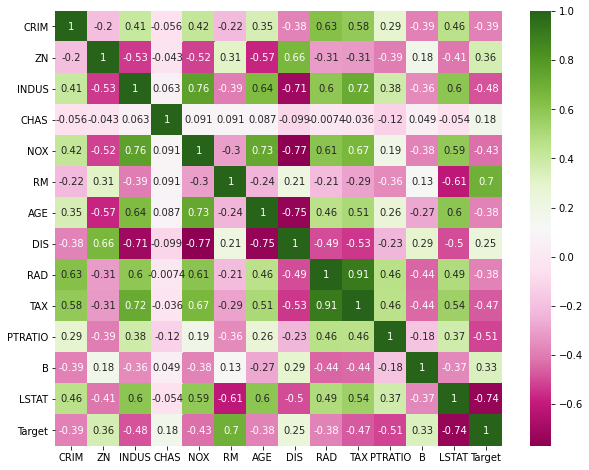

In [30]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))

full_data = X.copy()

full_data["Target"] = y.copy()

corr = full_data.corr()

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            cmap="PiYG")

There are a few variables which have quite a high correlation with other variables. For example, `DIS` is highly correlated with `INDUS`, `NOX` and `AGE`. In the regression, we can check if all of these variables end up being significant and if not, we can refine our regression to remove any variables that end up contributing weakly to the prediction.

### Calculate OLS coefficients

Now that we have taken a good look at the data and ensured that it is appropriate for our model, we can create it. The library statsmodels provides a lot of OLS tools and great visualizations for this task. By printing the `.summary()` method of the fit results, we can easily see all the details of the regression.

In [31]:
import statsmodels.api as sm

model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Tue, 03 Nov 2020   Prob (F-statistic):                        0.00
Time:                        19:29:57   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [32]:
results.mse_resid

24.803339271894536

From this, we can see that quite a few variables are insignificant such as `INDUS`, `AGE`, `NOX`, `TAX`, `RAD` and `CRIM`. We do have a high R-square and adjusted R-square but it is good practice to remove these variables as they may yield misleading coefficients for other variables. The mean square error is a common measure to compare algorithm's success and here it is just under 25. Note that variable `ZN` also becomes insignificant in the reduced model, so it has been removed as well.




In [33]:
features_tuned = ['CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

model_tuned = sm.OLS(y, X[features_tuned])

results_tuned = model_tuned.fit()

print(results_tuned.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1853.
Date:                Tue, 03 Nov 2020   Prob (F-statistic):                        0.00
Time:                        19:29:57   Log-Likelihood:                         -1537.2
No. Observations:                 506   AIC:                                      3086.
Df Residuals:                     500   BIC:                                      3112.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [34]:
results_tuned.mse_resid

25.790347283520102

Now we see that all variables are significant (t-values are above 2.8/p-values below 0.06). Without these variables, the R-square values have not changed much compared to the last regression. We see that the average error is also not too much different without these variables. However, the F-stat is much higher in this regression. The F-stat in a regression is the chance that all regression coefficients are equal to zero if it is closer to 0. In other words, the model has no predictive capability. This all indicates that removing these variables may remove noise from our regression and yield better predictions.

### Spliting the sample

In the previous examples, the OLS was optimized based on all available data. However, if we want to check if this relationship would also hold for new data points and we assume those data points come from the same population distribution, it can be useful for us to reserve some data points only for checking the algorithm after. This concept is called the train-test split. Some data is reserved for calculating the optimal coefficients while the rest is used for testing the model on unseen data later.

In order to do this, let's first split the data into two random groups. One group will be called the training data, and the next the test data.

In [35]:
X_train = X.sample(frac=0.5, random_state=888)

y_train = y.iloc[X_train.index,:] # use the index of X_train to extract the corresponding y values

X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
212,0.21719,0.0,10.59,1.0,0.489,5.807,53.8,3.6526,4.0,277.0,18.6,390.94,16.03
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59
363,4.22239,0.0,18.10,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,20.2,353.04,14.64


In [36]:
X_test = X.iloc[-X_train.index,:] # using the inverse selector to get the test data

y_test = y.iloc[-X_train.index,:]

X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
294,0.08199,0.0,13.92,0.0,0.437,6.009,42.3,5.5027,4.0,289.0,16.0,396.90,10.40
232,0.57529,0.0,6.20,0.0,0.507,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,396.90,13.59
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
143,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42


In [37]:
print(X_train.shape, X_test.shape) # check that the shapes match up with what is expected

(253, 13) (253, 13)


Now that we have split the data into two equally sized chunks, training and test data, we can fit a model with one set of the data. We will then use our model to predict on the training data and check the mean square error.

In [38]:
model_train = sm.OLS(y_train, X_train[features_tuned]) # train new model based on training data only

results_train = model_train.fit()

print(results_train.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1321.
Date:                Tue, 03 Nov 2020   Prob (F-statistic):                   1.48e-184
Time:                        19:29:57   Log-Likelihood:                         -732.17
No. Observations:                 253   AIC:                                      1476.
Df Residuals:                     247   BIC:                                      1498.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [39]:
results_train.mse_resid

19.57107517531429

We see that the mean square error of this data is much smaller than the previous mean square error. This could be the result of less samples for the coefficients to be drawn from which is causing some bias in the model. We can check if the MSE from the test data is closer to the original regression value of about 25.

In [40]:
results_test = results_train.predict(X_test[features_tuned])

print(results_test)

294    23.716093
232    40.489611
494    20.292746
12     21.594107
143    16.821783
         ...    
481    26.417758
163    46.776596
361    20.630271
360    24.205373
390    16.896285
Length: 253, dtype: float64


In [41]:
residuals_sq_test = (np.vstack(results_test) - y_test) ** 2

MSE_test = np.sum(residuals_sq_test) / X_test.shape[0]

print(MSE_test)

Target    25.505434
dtype: float64


We see that the mean square error in the test data is consistent with the mean square error that we saw when all data was used. This is a good sign that our model is relatively robust, even with less data we get a similar score.

## Data for classification 
The lecture has introduced two flavors of predictive modeling, regression and classification. So far, we have focused on regression. Recall that classification differs from regression in the scaling of the target variable. Regression assumes a numeric target variable, like sales, whereas classification assumes a discrete target. For simplicity, we consider a binary target variable with just two states. You have seen many business use cases for binary classification in the lecture. Here, we simply assume examples 

- Introduce students to data generation for classification 
- lecture has not introduced any classifier up to this point. Still showcase the logit model, say something like similar to linear regression but for classification, details to follow in chapter 5. Use statsmodels api for the logit model
- Whole part can be based on the below code, which is nice and already has explanations. Only some adjustments needed



### Generating Data

For this exercise we will generate our own (synthetic) data, to better understand what we are doing and what the logistic regression in particular does. For example, we will consider data in two dimensions. This is useful because we can easily plot the data.

To create synthetic data, you will use routines to generate random numbers. To ensure that you get the same result when you run your code multiple times, you should first fix the seed of the random number generator. We have already created a *code* cell below, which you can now edit to fix the seed.

(Hint: if you have paid attention to the [read me](https://github.com/stefanlessmann/VHB_ProDoc_ML/blob/master/README.md), this task should be familiar.) 

In [42]:
# set random seed, such that every run yields the same sequence of random numbers
np.random.seed(888)

We want to generate a data set for binary classification. This means that each of the data points that we will create belongs to one out of two classes.

A surprisingly large number of real-life (business) problems can be framed as a two-class classification problem, as we will discuss intensively in the course. 

To facilitate plotting the data, we will focus on a two-dimensional setting. Each of our data points is characterized by two attributes or, if you prefer, (independent) variables. Assume you want to predict whether a machine is going to break in the next week. Break or do not break are the two possible states (i.e., classes). The attributes could then be the temperature of the machine and the time it is running.

In this task, we assume that the data of each class comes from a multivariate normal distribution. Utilize the different functions within *numpy.random* to generate normally distributed data. Note that you need two normals with different parameters; one set of parameters for class 1 and another set of parameters for class 2. You can play with the parameters to create data in which the seperation of the two classes using a classification model is easier or harder. 

Create a reasonable number of observations, e.g., around 1000 - 5000. Recall that you need to store three values for each data point, one for the class label (class 1 or class 2) and one value for each of the two attributes. Examine ways to store the data in a matrix-like array. 

In [43]:
# Write code to generate your data with two normally distributed attributes and a binary class label.


# var_1 = np.random.multivariate_normal(mean=[0,0], cov=[[1, .75],[.75, 1]], size=1000)
# var_2 = np.random.multivariate_normal(mean=[0,0], cov=[[1, .75],[.75, 1]], size=1000)

class1_x = np.random.normal(loc=1, scale=1, size=1000)
class1_y = np.random.normal(loc=1, scale=1, size=1000)

class2_x = np.random.normal(loc=4, scale=1, size=1000)
class2_y = np.random.normal(loc=4, scale=1, size=1000)

lab1 = np.repeat(0, 1000)
lab2 = np.repeat(1, 1000)

class1 = np.vstack((class1_x, class1_y)).T
class2 = np.vstack((class2_x, class2_y)).T

data = np.vstack((class1,class2))
labels = np.concatenate((lab1,lab2))

data[:5,:]

array([[ 0.82379913,  0.52703441],
       [ 1.18887636,  0.46382642],
       [ 1.82674718,  0.36148983],
       [ 0.96755269, -0.40695666],
       [ 0.34750058,  1.73195855]])

Once you have created your data, create a scatter plot using the function *scatter*, which the library matplotlib provides. Here you can find an [example how your result shoud look like](https://github.com/stefanlessmann/VHB_ProDoc_ML/blob/master/prodoc_ml_miniassign_1_demo_plot1.png). In the example, we have denoted our two variables as $x_1$ and $x_2$ and used the binary class label to color the data points. 

Do not forget to alter the parameters of your two normal distributions and examine how changing the parameters make the two classes easier or harder to distinguish.
  

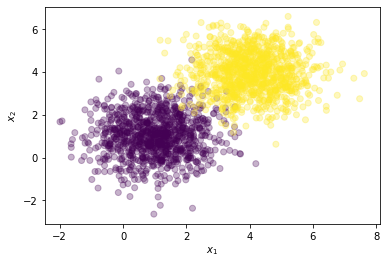

In [44]:
# Write code to create the scatter plot
plt.scatter(data[:,0], data[:,1], c=labels, alpha=.3);
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");

Next up, we would like to solve our toy classification problem using logistic regression. By 'solve' we mean that the logistic model should be able to distinguish data points of the two classes based on their attribute values. More formally, given a data point $ \boldsymbol x \in \mathbb{R}^2 $ with values $x_1$ and $x_2$, our logistic model should provide an estimate of the probability $p \left ( y| \boldsymbol x \right )$, with $ y \in \left \{ 0,1 \right \} $ denoting the binary class label. To achieve this, the logistic model will maximize the likelihood of the data. In case this does not sound familiar, note that we will brielfy revisit logistic regression in the course. Still, it would be a good idea to read the [wikipedia page on logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) or one of the many tutorials on the topic (e.g., [here](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)) to refresh your stats skills.  

With regard to Python, both statsmodels and scikit learn are good python packages to use for logistic regression. Start with using scikit learn. Make sure to set the penalty to 'none' such that no regularization is applied.

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='none', fit_intercept=True)
model.fit(data, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Having estimated the logit model, we want to evaluate our results. To that end, we first inspect the estimated model, i.e. the intercept term and the coefficients. You should be familiar with this step from your experiences with [linear regression](https://en.wikipedia.org/wiki/Linear_regression).

In [46]:
# Print intercept and coefficients of the estimated logit model
print('Intercept:')
print(model.intercept_)

print('Coefficients:')
print(model.coef_)

Intercept:
[-16.24606478]
Coefficients:
[[3.30425773 3.15027128]]


Speaking about linear regression, wasn't there are nice way to summarize the estimated model, depicting coefficient values, test statistics, p-values and the like? Shouldn't logistic regression give a similarly neat output? Yes, it should and it actually can, provided we use the statsmodels package instead of sklearn. In brief, scikit-learn is the 'go-to library' for machine learning in Python. We will use it a lot in the course. However, let's also play with statsmodels. 

Repeat the above task and estimate a logit model but this time using statsmodels.  Also produce a compelling summary table of your model including p-values and fitting statistics. Use a different variable name for the resulting model, for instance 'stat_model_logit', than you used above.

In [47]:
 # Code to run logistic regression and output resulting model using statsmodel library
import statsmodels.api as sm

stat_model_logit = sm.Logit(labels, data)
result = stat_model_logit.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.557562
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.196      
Dependent Variable: y                AIC:              2234.2468  
Date:               2020-11-03 19:29 BIC:              2245.4486  
No. Observations:   2000             Log-Likelihood:   -1115.1    
Df Model:           1                LL-Null:          -1386.3    
Df Residuals:       1998             LLR p-value:      5.8337e-120
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
----------------------------------------------------------------------
       Coef.      Std.Err.       z        P>|z|      [0.025     0.975]
----------------------------------------------------------------------
x1     0.2366       0.0382     6.1968     0.0000     0.1618     0.3115
x2     0.1645       0.0385     4.2709

Furthermore, we want to look at the classification accuracy of the model, that is the number of cases it classifies correctly. For simplicity, we will calculate classification accuracy **in-sample**.  This means that we use the same data set, which we used to before to estimate the model, to compute its accurcy. Note that this is typically a bad idea. We will discuss why in the course, but maybe you already have an answer? 

Calculating classification accuracy, i.e. the fraction of correctly classified cases, requires setting a probability treshold might. Let's consider a value of .5 for now. 

If the accuracy is wildly off, either you deliberately generated data that was hard to separate into classes or you did something wrong. Go back to data generation, alter the parameters of the normal distributions, and examine how accuracy varies with parameter adjustments. 

In [48]:
# Calculate the classification accuracy of the logit model in-sample using a classification cut-off of 0.5
# Using inbuild scikit-learn functionality, you can achive this with one line of code
print('Accuracy:')
model.score(data, labels)

Accuracy:


0.984

To get a better intuition for how the logistic regression works, we want to plot the decision boundary of the regression model given our datapoints. There are multiple options to do this, the simplest being drawing a line given the parameters of the model. Also adding our data, as we did before, this will produce a very nice graph of our classification problem and the classify we developed. Here is once again an [example](https://github.com/stefanlessmann/VHB_ProDoc_ML/blob/master/prodoc_ml_miniassign_1_demo_plot2.png). Your plot should look similar.

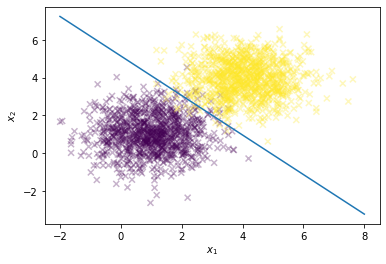

In [49]:
# Write code to create a two-dimensional plot of the data and how the logistic regression separates the two classes
w = model.coef_[0]
xx = np.linspace(-2,8)

a = -w[0] / w[1]
b = -model.intercept_[0] / w[1]

yy = a * xx + b

fig = plt.figure()
plt.scatter(data[:,0], data[:,1], c=labels, alpha=.3, marker='x')
plt.plot(xx,yy);
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");

## Synthetic data generation in sklearn

There are quite a few ways with which we can generate synthetic data using sklearn. You can check out all of the options [here](https://scikit-learn.org/stable/modules/classes.html#samples-generator). We will quickly review the functionality for some of the more important functions:


*   `make_blobs`
*   `make_regression`
*   `make_classication`

It is highly recommended to take a look at [this post](https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922) which does a great job at illustrating the differences of each data generation function.

In [50]:
from sklearn.datasets import make_blobs, make_regression, make_classification

### make_blobs

The function `make_blobs` creates data points centered around centroids in an n-dimensional space which can be distinguished with a linear classifier. You can how many features to build this space and play with other options to increase the number of centroids/classes (`n_class`), their distance from each other (`class_sep`) and a select a `random_state` for reproducibility. Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) for more settings.

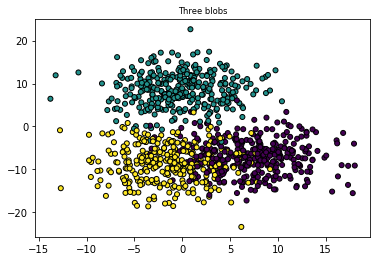

In [51]:
plt.title("Three blobs", fontsize='small')
X_blob, y_blob = make_blobs(n_samples=1000, n_features=2, cluster_std=4.0, random_state=888)
plt.scatter(X_blob[:, 0], X_blob[:, 1], marker='o', c= y_blob, s=25, edgecolor='k') # feature 1 on x, feature 2 on y and color by target

### make_classification

The function `make_classification` initially creates clusters of normally distributed points and assigns an equal number of clusters to each class. Afterwards, interdependence in features and various types of noice are added. You can add informative, redundant and repeated features with `n_informative` , `n_redundant` and `n_repeated` respectively. Like the previous function, the number of classes can be adjusted using `n_class` and their distance from one anothe can be adjusted using `class_sep`. Reproducibility is again controlled by `random_state`. Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) for more settings.

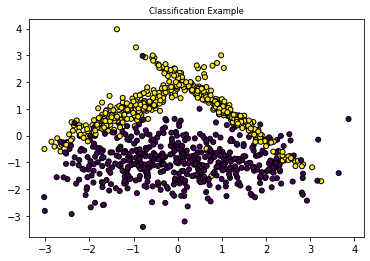

In [52]:
plt.title("Classification Example", fontsize='small')
X_class, y_class = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=888)
plt.scatter(X_class[:, 0], X_class[:, 1], marker='o', c=y_class, s=25, edgecolor='k') # feature 1 on x, feature 2 on y and color by target

### make_regression

The function `make_classification` initially creates clusters of normally distributed points and assigns an equal number of clusters to each class. Afterwards, interdependence in features and various types of noice are added. You can add informative, redundant and repeated features with `n_informative` , `n_redundant` and `n_repeated` respectively. The [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) gives more clarity on the other possible settings.

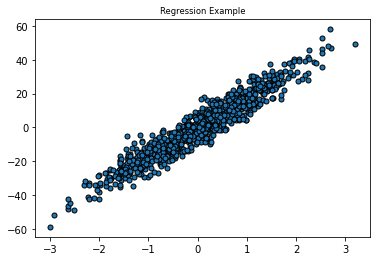

In [53]:
plt.title("Regression Example", fontsize='small')
X_reg, y_reg = make_regression(n_samples=1000, n_features=1, noise=5.0, random_state=888)
plt.scatter(X_reg, y_reg, marker='o', s=25, edgecolor='k') # note that here we've plotted feature and target directly rather than feature 1 and feature 2